# Wine Market Analysis

## Pre-Analysis

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix 

# Read the dataset.
df_original = pd.read_csv("winemag-data_first150k.csv")

### Data Cleaning

#### Before Cleaning

In [4]:
# Check how many columns and rows in the dataset.
df_original.shape

(150930, 11)

In [6]:
# Renamed the first Column and check the first five rows.
df_original = df_original.rename(columns={"Unnamed: 0":"id"})
df_original.head()

,id,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [8]:
# Find out the duplicaet value
print("Total number of examples: ", df_original.shape[0])
print("Number of examples with the same description: ", df_original[df_original.duplicated(['description'])].shape[0])

Total number of examples:  150930
Number of examples with the same description:  53109


In [10]:
# Find out missing values
missingtotal = df_original.isnull().sum().sort_values(ascending = False)
missingtotal

region_2       89977
designation    45735
region_1       25060
price          13695
country            5
province           5
id                 0
description        0
points             0
variety            0
winery             0
dtype: int64

#### After Cleaning

In [12]:
# Duplicate rows data cleansing
Cleanwine = df_original.drop_duplicates('description', keep='first', inplace=False)
Cleanwine.dropna(subset=['description','points','price'], inplace=True)
Cleanwine.shape

# Missing columns values cleansing
Cleanwine = Cleanwine.drop('designation', axis=1)
Cleanwine = Cleanwine.drop('region_1', axis=1)
Cleanwine = Cleanwine.drop('region_2', axis=1)

# Missing rows data in country and province cleansing
Cleanwine.dropna(subset=['country', 'province'], inplace=True)

missingtotal = Cleanwine.isnull().sum().sort_values(ascending = False)
missingtotal

C:\Users\user\AppData\Local\Temp\ipykernel_32804\2933064808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cleanwine.dropna(subset=['description','points','price'], inplace=True)


id             0
country        0
description    0
points         0
price          0
province       0
variety        0
winery         0
dtype: int64

In [14]:
Cleanwine.shape

(89105, 8)

In [16]:
Cleanwine.head()

,id,country,description,points,price,province,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,96,235.0,California,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,96,90.0,California,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Oregon,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",95,66.0,Provence,Provence red blend,Domaine de la Bégude


## Data Visualization & Analysis

### Price Points Statistics Describe

In [18]:
# Price and points statistics number
Cleanwine[['points', 'price']].describe()

,points,price
count,89105.000000,89105.000000
mean,87.868526,33.659514
std,3.221974,37.668256
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,25.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


### Points

#### Points Distribution Bar Chart

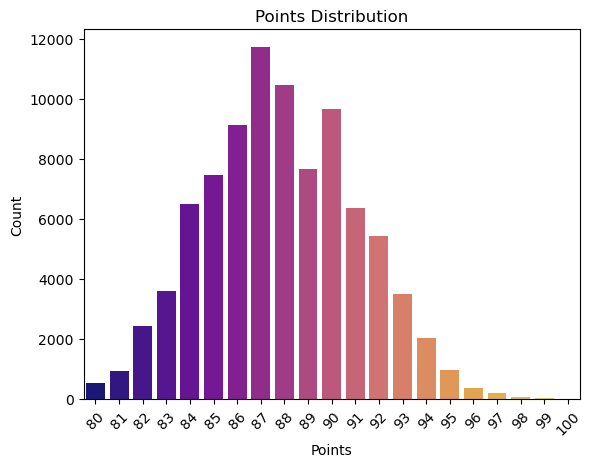

In [20]:
# Using seaborn to plot points bar chart
bar_points = Cleanwine['points'].value_counts()
sns.barplot(x=bar_points.index, y=bar_points.values, hue=bar_points.index, palette='plasma', legend=False)
# Adding titles and rotating X-axis labels
plt.title('Points Distribution')
plt.xlabel('Points')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

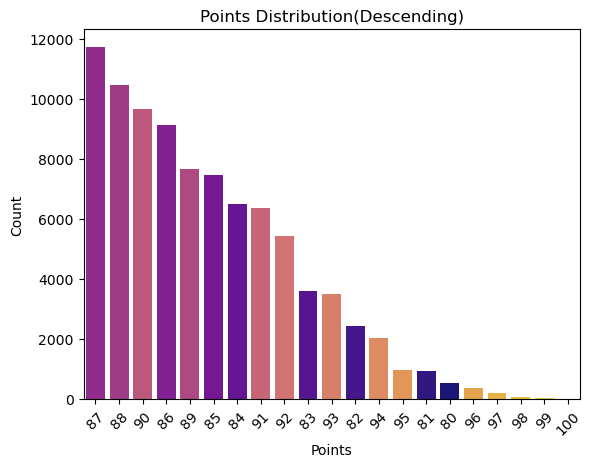

In [22]:
# Using seaborn to plot points bar chart
bar_points_sort = Cleanwine['points'].value_counts()

# Sort the index based on count values (Y-axis)
sorted_index = bar_points_sort.sort_values(ascending=False).index

# Plot the bar chart, specifying the order
sns.barplot(x=bar_points_sort.index, y=bar_points_sort.values, hue=bar_points_sort.index, order=sorted_index, palette='plasma', legend=False)

# Adding titles and rotating X-axis labels
plt.title('Points Distribution(Descending)')
plt.xlabel('Points')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Price

#### Price Distribution Line Chart

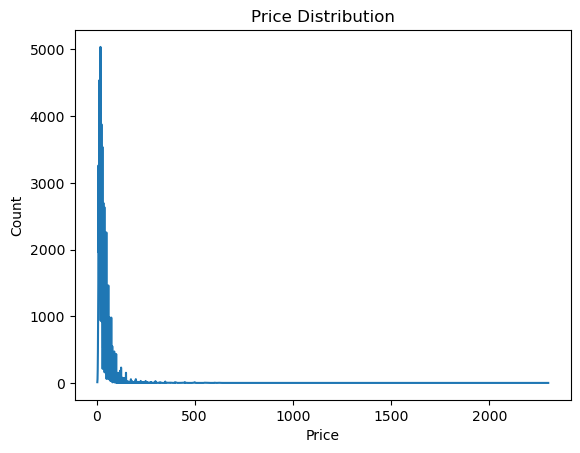

In [24]:
# Plot Price
Cleanwine['price'].value_counts().sort_index().plot.line()
# Adding titles
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

#### Price Points Scatter Plot

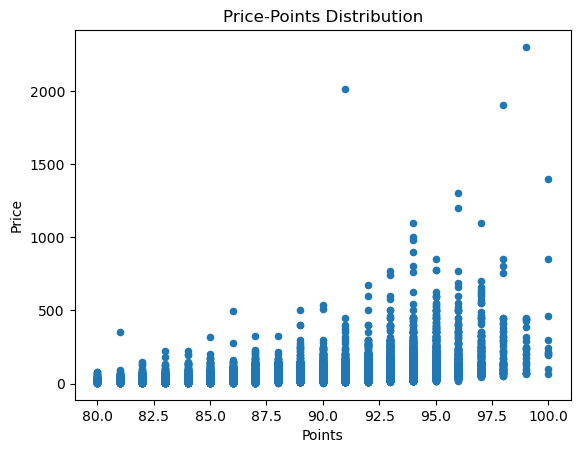

In [26]:
#Scatter Plot
Cleanwine.plot.scatter(x='points', y='price')
# Adding titles
plt.title('Price-Points Distribution')
plt.xlabel('Points')
plt.ylabel('Price')
plt.show()

### Country & Province

#### Country Distribution Bar Chart

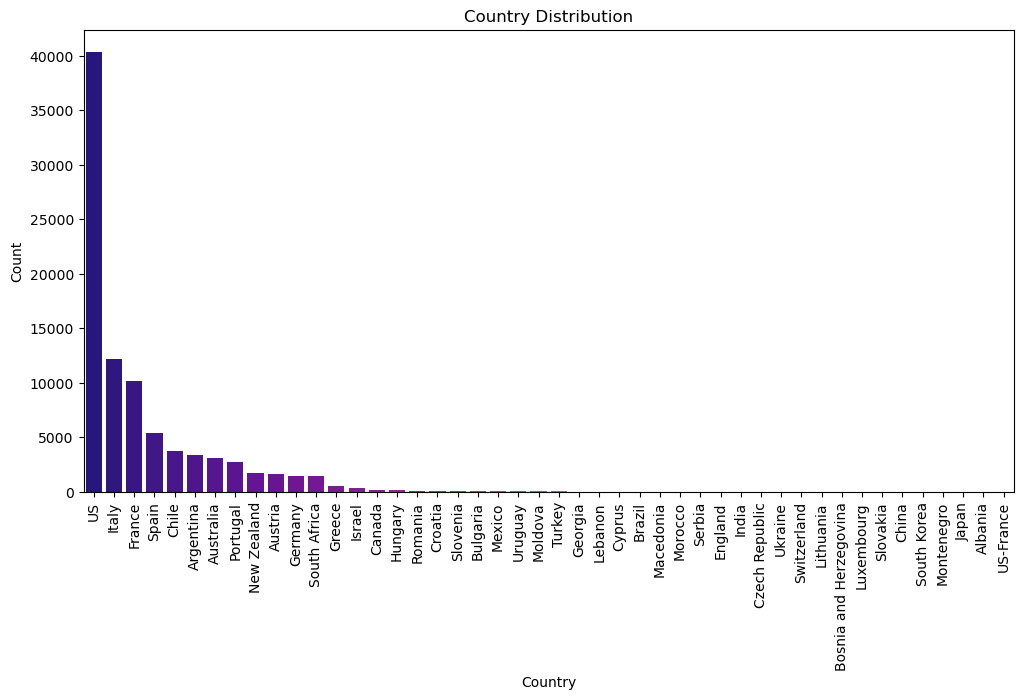

In [28]:
# Using seaborn to plot country bar chart
plt.figure(figsize=(12, 6))
bar_countries = Cleanwine['country'].value_counts()
sns.barplot(x=bar_countries.index, y=bar_countries.values, hue=bar_countries.index, palette='plasma', legend=False)
# Adding titles and rotating X-axis labels
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.show()

This Country bar plot is really intersesting. US really dominates the wine market. I thought the countries that dominate the market might be France.

#### Province Distribution Bar Chart

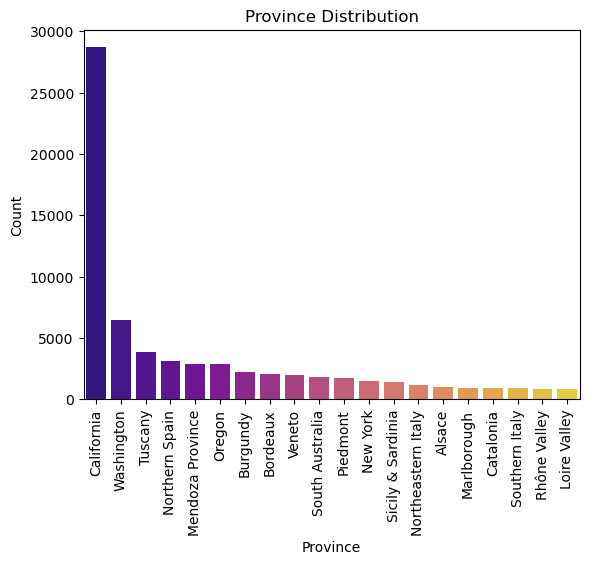

In [30]:
# Using seaborn to plot province bar chart
bar_province = Cleanwine['province'].value_counts().head(20)
sns.barplot(x=bar_province.index, y=bar_province.values, hue=bar_province.index, palette='plasma', legend=False)
# Adding titles and rotating X-axis labels
plt.title('Province Distribution')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.show()

#### Countries that dominate the 80% of wine market

In [36]:
#Count the total number of times that a country have shown in this dataset
df_count_country = Cleanwine.groupby('country', as_index = False).count()
df_count_country ['counts'] = df_count_country ['id'] 
top_country_wine = df_count_country .loc[:,['country' , 'counts']]
top_country_wine = top_country_wine.sort_values('counts', ascending= False)
top_country_wine.head(5)

,country,counts
42,US,40338
21,Italy,12152
14,France,10184
39,Spain,5370
8,Chile,3700


In [38]:
# Count the total accumulate counts
top_country_wine['cumsum_counts'] = top_country_wine['counts'].cumsum()
top_country_wine.head(5)

,country,counts,cumsum_counts
42,US,40338,40338
21,Italy,12152,52490
14,France,10184,62674
39,Spain,5370,68044
8,Chile,3700,71744


In [40]:
# Count the total counts
total_counts = top_country_wine['counts'].sum()
print(total_counts)

89105


In [42]:
# Count the total accumulated percentage of counts
top_country_wine['Counts %'] = top_country_wine['cumsum_counts'] / total_counts
top_country_wine80 = top_country_wine[ top_country_wine['Counts %'] <= 0.8 ] 
top_country_wine80

,country,counts,cumsum_counts,Counts %
42,US,40338,40338,0.452702
21,Italy,12152,52490,0.589080
14,France,10184,62674,0.703372
39,Spain,5370,68044,0.763638


In [44]:
# Percentage of countries that dominate the 80% of wine market。
contr_percent = len(top_country_wine80) / int(total_counts)
print( str(round( contr_percent*100 ,3 )) + '% countries dominate 80% of the wine market.' )

0.004% countries dominate 80% of the wine market.


### Variery

#### Variety Distribution Bar Chart

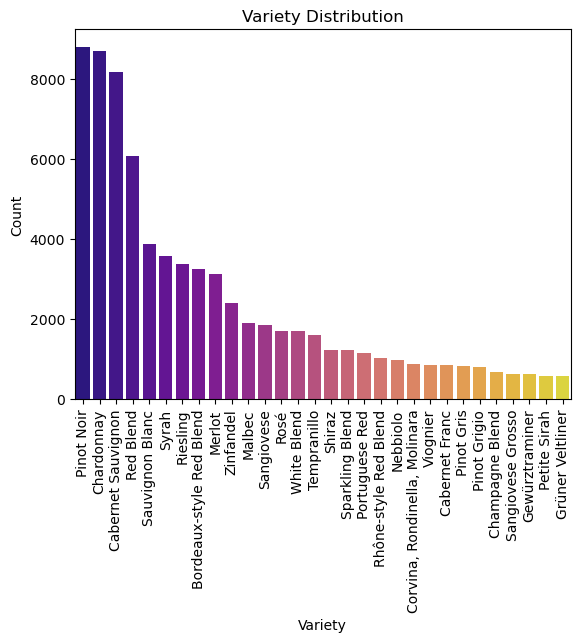

In [46]:
# Using seaborn to plot variety bar chart
bar_variety = Cleanwine['variety'].value_counts().head(30)
sns.barplot(x=bar_variety.index, y=bar_variety.values, hue=bar_variety.index, palette='plasma', legend=False)
# Adding titles and rotating X-axis labels
plt.title('Variety Distribution')
plt.xlabel('Variety')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.show()

#### Points Variey Box Chart

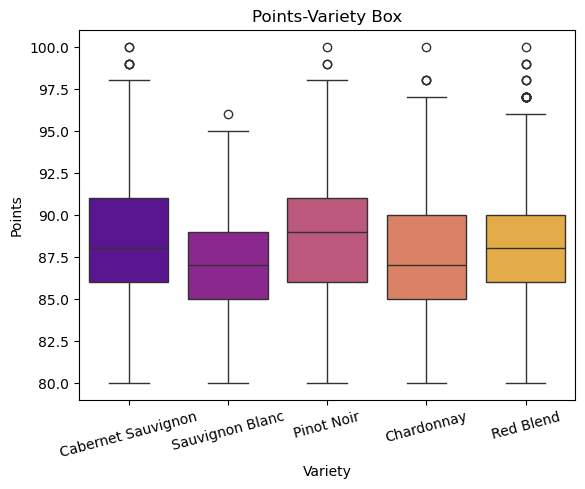

In [51]:
# Using seaborn to plot Points-Variety box chart
box_price_variety = Cleanwine[Cleanwine.variety.isin(Cleanwine.variety.value_counts().head(5).index)]
sns.boxplot(x = 'variety',y = 'points',data = box_price_variety, hue='variety', palette='plasma', legend=False)
# Adding titles and rotating X-axis labels
plt.title('Points-Variety Box')
plt.xlabel('Variety')
plt.ylabel('Points')
plt.xticks(rotation=15)  
plt.show()

#### Grapes Variety that dominate the 80% of wine market

In [53]:
#Count the total number of times that a variety have shown in this dataset
df_count_variety = Cleanwine.groupby('variety', as_index = False).count()
df_count_variety['counts'] = df_count_variety['id']
top_variety_wine = df_count_variety.loc[:,['variety', 'counts']]
top_variety_wine = top_variety_wine.sort_values('counts', ascending= False)
top_variety_wine.head(10)

,variety,counts
394,Pinot Noir,8801
109,Chardonnay,8696
69,Cabernet Sauvignon,8182
420,Red Blend,6072
458,Sauvignon Blanc,3871
502,Syrah,3572
426,Riesling,3384
50,Bordeaux-style Red Blend,3240
293,Merlot,3131
615,Zinfandel,2403


In [55]:
# Count the total accumulate counts
top_variety_wine['cumsum_counts'] = top_variety_wine['counts'].cumsum()
top_variety_wine.head(10)

,variety,counts,cumsum_counts
394,Pinot Noir,8801,8801
109,Chardonnay,8696,17497
69,Cabernet Sauvignon,8182,25679
420,Red Blend,6072,31751
458,Sauvignon Blanc,3871,35622
502,Syrah,3572,39194
426,Riesling,3384,42578
50,Bordeaux-style Red Blend,3240,45818
293,Merlot,3131,48949
615,Zinfandel,2403,51352


In [61]:
# Count the total counts
total_counts = top_variety_wine['counts'].sum()
print(total_counts)

89105


In [63]:
# Count the total accumulated percentage of counts
top_variety_wine['Counts %'] = top_variety_wine['cumsum_counts'] / total_counts
top_variety_wine80 = top_variety_wine[ top_variety_wine['Counts %'] <= 0.8 ]
top_variety_wine80

,variety,counts,cumsum_counts,Counts %
394,Pinot Noir,8801,8801,0.098771
109,Chardonnay,8696,17497,0.196364
69,Cabernet Sauvignon,8182,25679,0.288188
420,Red Blend,6072,31751,0.356332
458,Sauvignon Blanc,3871,35622,0.399776
502,Syrah,3572,39194,0.439863
426,Riesling,3384,42578,0.477841
50,Bordeaux-style Red Blend,3240,45818,0.514202
293,Merlot,3131,48949,0.549341
615,Zinfandel,2403,51352,0.576309


In [65]:
# Percentage of grape varieties that dominate the 80% of wine market。
contr_percent = len(top_variety_wine80) / int(total_counts)
print( str(round( contr_percent*100 ,2 )) + '% of the variety dominate 80% of the wine market.' )

0.03% of the variety dominate 80% of the wine market.


### Recommendation System

In [67]:
# Lets choice rating of wine is points, title as user_id, and variety,
col = ['province','variety','points']

wine1 = Cleanwine[col]
wine1 = wine1.dropna(axis=0)
wine1 = wine1.drop_duplicates(['province','variety'])
wine1 = wine1[wine1['points'] > 85]

wine_pivot = wine1.pivot(index= 'variety',columns='province',values='points').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)

In [69]:
knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(wine_pivot_matrix)

In [71]:
# Type in any Variety to get recommendations
query_wine = "Merlot"  
if query_wine in wine_pivot.index:
    query_index = wine_pivot.index.get_loc(query_wine)
    
    # Finding nearest neighbors
    distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6)
    
    # Printing recommendations
    print(f'Recommendations for ## {query_wine} ##:')
    for i in range(1, len(distance.flatten())):
        print(f'{i}: {wine_pivot.index[indice.flatten()[i]]} with distance: {distance.flatten()[i]}')
else:
    print(f'Wine variety "{query_wine}" not found in dataset.')

Recommendations for ## Merlot ##:
1: Syrah with distance: 0.49531056840947896
2: Cabernet Sauvignon with distance: 0.512965483611294
3: Bordeaux-style Red Blend with distance: 0.5285731704701458
4: Cabernet Franc with distance: 0.5358438837055185
5: Red Blend with distance: 0.536700035381589


## Reference

1. https://www.kaggle.com/code/jellyfish0821/wine-reviews-machine-learning-pipeline
2. https://www.kaggle.com/code/kabure/wine-review-s-eda-recommend-systems
3. https://www.kaggle.com/code/chandraroy/plotting-with-pandas-matplotlib-and-seaborn